# 配体受体通讯分析

已经出现了一些用于从单细胞转录组学推断细胞间通讯的计算工具，这些工具可以分为两类：一类是仅预测细胞间
通讯相互作用的工具，通常称为配体受体推断方法，另一类则额外估计由细胞间通讯诱导的细胞内活性。
这两类工具都使用基因表达信息作为蛋白质丰度的替代指标，并且通常需要将细胞聚类成具有生物学意义的组。
这些细胞间通讯工具推断细胞组之间的细胞间通讯，其中一个组是细胞间通讯事件的来源，另一个组是接收者。
因此，细胞间通讯事件通常表示为来自来源和接收细胞组的蛋白质之间的相互作用

关于相互作用蛋白的信息通常从先验知识资源中提取。在配体受体方法中，相互作用也可以通过异源蛋白复合物来表示，
因为不同的亚基组合可以诱导不同的反应，并且包含蛋白复合物信息已被证明可以降低假阳性率。另一方面，
模拟细胞内信号传导的方法也利用了接收细胞类型的功能信息，因此需要额外的信息，例如细胞内蛋白蛋白相互作用网络
和/或基因调控相互作用

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import exprmat as em

# set working directory
em.setwd('/home/data/yangz/shared/tutorial/single-cell-rna')

In [3]:
expm = em.load_experiment('expression', load_samples = False, load_subset = 'mono-neutro')

[!] samples are not dumped in the experiment directory.


In [4]:
print(expm)

annotated data of size 10160 × 19389
subset mono-neutro of size 10160 × 19389
contains modalities: rna

 modality [rna]
    obs : sample <cat> batch <cat> group <cat> modality <cat> taxa <cat> barcode <o> ubc <o>
          n.umi <f64> n.genes <i64> n.mito <f64> n.ribo <f64> pct.mito <f64> pct.ribo <f64>
          filter <bool> score.doublet <f64> score.doublet.se <f64> is.doublet <bool> qc <bool>
          leiden <cat> cell.type <cat> score <f64> potency <cat> relative <f64> score.preknn <f64>
          potency.preknn <cat> ppt.pseudotime <f64> ppt.seg <cat> ppt.edge <cat>
          ppt.milestones <cat>
    var : chr <cat> start <i64> end <i64> strand <cat> id <o> subtype <cat> gene <cat> tlen <f64>
          cdslen <i64> assembly <cat> uid <o> vst.hvg <bool> vst.all.means <f64> vst.all.vars <f64>
          vst.all.vars.norm <f64> vst.all.hvg.rank <f32> vst.all.hvg <bool> n.umi <f64>
 layers : counts <f32> magic <f64> norm <f32>
   obsm : cnmf.10 <df> diffmap <arr:f32(5)> harmony <arr:

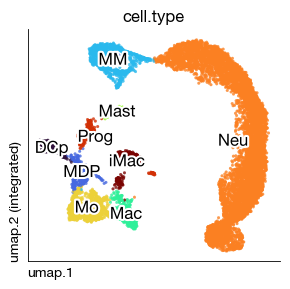

In [5]:
fig = expm.plot_rna_embedding(
    basis = 'umap', color = 'cell.type', annotate_style = 'text', legend = False,
    figsize = (3, 3), dpi = 100, ptsize = 4, contour_plot = False, slot = 'magic'
)

### 配体受体通讯分析

对于人和小鼠，已经有充分的数据库资源可供配体受体分析利用

In [6]:
expm.run_rna_ligand_receptor(
    flavor = 'ra',
    taxa_source = 'mmu',
    taxa_dest = 'mmu',
    gene_symbol = None,
    groupby = 'cell.type',
    use_raw = False,
    min_cells = 5,
    expr_prop = 0.1,
    n_perms = 500,
    seed = 42,
    de_method = 't-test',
    resource_name = 'consensus',
    verbose = True,
    key_added = 'lr',
    n_jobs = 50
)

[i] generating ligand-receptor stats for 10160 * 1177
[i] assuming that counts were log transformed with base e.
[i] running cellchat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━                        500 / 500   (00:08 < 00:00)


[i] running cellphonedb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━                        500 / 500   (00:00 < 00:00)


[i] running connectome
[i] running logfc
[i] running natmi
[i] running scseqcomm
[i] running singlecellsignalr


In [7]:
expm.get_rna_lr(
    source_labels = 'Neu', 
    target_labels = 'MDP',
    filter_fun = lambda x: (
        (x['cellchat.p'] < 0.05) & 
        (x['lr.means'] > 0.5) & 
        (x['magnitude'] >= 0.05)
    ),
    orderby = 'magnitude'
)[[
    'source', 'ligand.complex', 'target', 'receptor.complex', 
    'lr.probs', 'lr.means', 'cellchat.p', 'specificity', 'magnitude'
]]

,source,ligand.complex,target,receptor.complex,lr.probs,lr.means,cellchat.p,specificity,magnitude
14398,Neu,B2m,MDP,Tfrc,0.010995,1.246204,0.000,0.846389,0.057277
14421,Neu,Cd177,MDP,Pecam1,0.014151,0.898862,0.000,0.134182,0.059316
14368,Neu,Alcam,MDP,Nrp1,0.017538,0.851570,0.000,0.106970,0.086528
14501,Neu,Ltf,MDP,Tfrc,0.008983,1.240695,0.000,0.109280,0.094864
14509,Neu,Mmp9,MDP,Ifnar1,0.022763,1.450149,0.000,0.154498,0.118169
14384,Neu,App,MDP,Lrp10,0.014332,0.808052,0.000,0.318020,0.121360
14582,Neu,Timp2,MDP,Itgb1,0.018925,0.795467,0.000,0.154498,0.133762
14395,Neu,Arpc5,MDP,Ldlr,0.017987,1.061285,0.000,0.154498,0.137489
14348,Neu,Actr2,MDP,Ldlr,0.014802,0.909126,0.000,0.154498,0.137489
14379,Neu,App,MDP,Aplp2,0.013743,0.804731,0.000,0.154498,0.147030


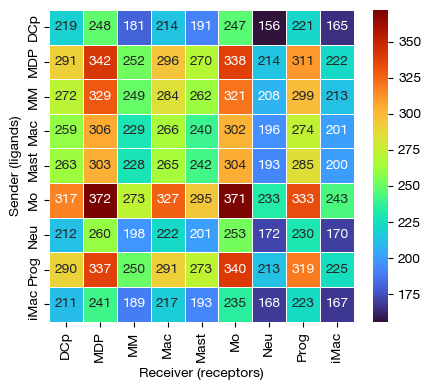

In [13]:
fig = expm.plot_rna_lr_heatmap(lr_key = 'lr', groupby = 'cell.type', figure_size = (4.5, 4))

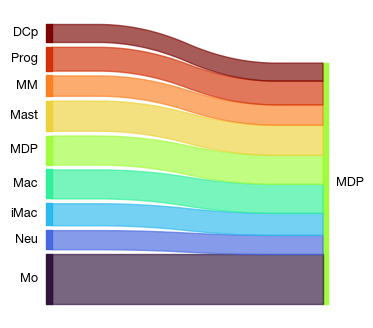

In [17]:
table = expm.get_rna_lr(
    source_labels = None, 
    target_labels = 'MDP',
    filter_fun = lambda x: (
        (x['cellchat.p'] < 0.05) & 
        (x['lr.means'] > 0.5) & 
        (x['magnitude'] >= 0.05)
    ),
    orderby = 'magnitude'
)[[
    'source', 'ligand.complex', 'target', 'receptor.complex', 
    'lr.probs', 'lr.means', 'cellchat.p', 'specificity', 'magnitude'
]]

fig = em.st.adata_plot_sankey(em.ad.AnnData(obs = table), None, obs1 = 'source', obs2 = 'target')

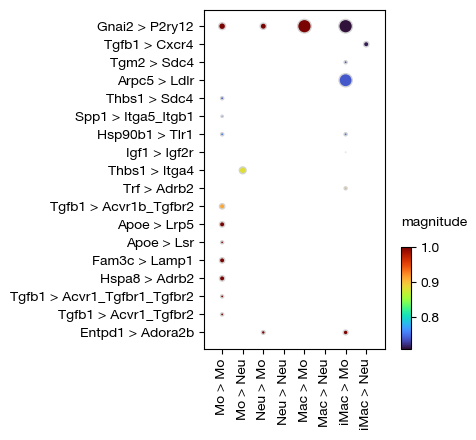

In [34]:
fig = expm.plot_rna_lr_dotplot(
    source_labels = ['Mo', 'Neu', 'Mac', 'iMac'], 
    target_labels = ['Mo', 'Neu'],
    filter_fun = lambda x: (
        (x['cellchat.p'] < 0.05) & 
        (x['lr.means'] > 0.5) & 
        (x['magnitude'] >= 0.7)
    ),
    colour = 'magnitude',
    size = 'specificity',
    lr_key = 'lr',
    orderby = 'magnitude',
    figure_size = (4.5, 4.5),
    size_ratio = 3,

    # paired from source_labels, dest_labels
    paired = False        
)

### 使用其他物种来源的数据库

对于其他物种，我们或许希望使用同源基因迁移已有的数据库，例如这里我们使用人类数据库迁移到小鼠
（尽管这是没有必要的，而且会引入额外的不可解释性）

In [35]:
expm.run_rna_ligand_receptor(
    flavor = 'ra',

    # use human database
    taxa_source = 'hsa',        
    taxa_dest = 'mmu',

    gene_symbol = None,
    groupby = 'cell.type',
    use_raw = False,
    min_cells = 5,
    expr_prop = 0.1,
    n_perms = 500,
    seed = 42,
    de_method = 't-test',

    # select a database that is only available to humans
    resource_name = 'cellphonedb',

    verbose = True,
    key_added = 'lr.hsa',
    n_jobs = 50
)

[i] generating ligand-receptor stats for 10160 * 230
[i] assuming that counts were log transformed with base e.
[i] running cellchat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━                        500 / 500   (00:05 < 00:00)


[i] running cellphonedb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━                        500 / 500   (00:00 < 00:00)


[i] running connectome
[i] running logfc
[i] running natmi
[i] running scseqcomm
[i] running singlecellsignalr


In [39]:
expm.get_rna_lr(
    source_labels = 'Neu', 
    target_labels = 'MDP',
    filter_fun = lambda x: (
        (x['cellchat.p'] < 0.05) & 
        (x['lr.means'] > 0.5) & 
        (x['magnitude'] >= 0.05)
    ),
    orderby = 'magnitude',
    lr_slot = 'lr.hsa'
)[[
    'source', 'ligand.complex', 'target', 'receptor.complex', 
    'lr.probs', 'lr.means', 'cellchat.p', 'specificity', 'magnitude'
]]

,source,ligand.complex,target,receptor.complex,lr.probs,lr.means,cellchat.p,specificity,magnitude
1341,Neu,Entpd1,MDP,Adora2b,0.002287,0.61827,0.0,0.051219,0.711509


In [40]:
expm.save()

[i] main dataset write to expression/subsets/mono-neutro.h5mu


### 细胞内受体信号活性推断

NicheNet 可以通过将靶信号的胞内表达调控网络纳入优先级排序，选择细胞受体的内在活性推断，无论这个配体
是否在当前数据集中被捕捉到。我们首先需要确定两组细胞之间的差异基因，在此差异基因的基础上进行推断

例如，我们希望了解中性粒细胞在从髓细胞成熟的过程中变化的基因更可能归因于什么信号的激活，我们获取 Neu 相对于 MM 的上调差异基因

In [ ]:
expm.run_rna_markers(
    groupby = 'cell.type',
    mask_var = None, 
    groups = ['Neu'],
    reference = 'MM',
    n_genes = None, rankby_abs = False, pts = True, 
    key_added = 'deg',
    method = 't-test', 
    corr_method = 'benjamini-hochberg',
    tie_correct = False,
    gene_symbol = 'gene',
    layer = 'X'
)

In [6]:
upreg = expm.get_rna_markers(
    de_slot = 'deg',
    min_pct = 0.0,
    max_pct_reference = 0.75,
    max_q = 0.05,
    min_lfc = 0.5, max_lfc = 25,
    remove_zero_pval = False
)

upreg

[i] fetched diff `Neu` over `MM` (2647 genes)


,names,scores,lfc,p,q,gene,pct,log10.p,log10.q
0,rna:mmu:g23254,88.422989,5.018202,0.000000,0.000000,Retnlg,0.980053,inf,inf
1,rna:mmu:g1350,81.188042,3.903263,0.000000,0.000000,Cxcr2,0.915041,inf,inf
2,rna:mmu:g9641,79.673683,3.908900,0.000000,0.000000,Slfn1,0.891105,inf,inf
3,rna:mmu:g31928,77.287819,4.201951,0.000000,0.000000,Dhrs9,0.778221,inf,inf
4,rna:mmu:g39854,76.522423,4.055368,0.000000,0.000000,Hacd4,0.789894,inf,inf
...,...,...,...,...,...,...,...,...,...
3163,rna:mmu:g51189,2.227320,0.639446,0.026108,0.049468,Zfp619,0.028812,1.583225,1.305672
3165,rna:mmu:g52904,2.226518,0.806935,0.026142,0.049523,P2ry6,0.016844,1.582656,1.305189
3166,rna:mmu:g36406,2.225839,19.717693,0.026058,0.049378,Tigd4,0.000739,1.584063,1.306468
3167,rna:mmu:g62173,2.225750,1.040313,0.026182,0.049589,Xlr5a,0.011525,1.581994,1.304611


In [8]:
expm.run_rna_nichenet(
    taxa = 'mmu',
    receiver = ['Neu'],
    sender = None,
    identity = 'cell.type',
    foreground = upreg['gene'].tolist(),
    background = None,
    expression_threshold = 0.001,
    ncpus = 20,
    key_added = 'nichenet'
)

[i] background gene set constructed with size 15860
[i] using user-specified foreground gene set of size 2647
[i] using 1202(all) potential ligands
[i] using 580 expressed receptors in receivers


   ━━━━━━━━━━━━━━━━━━ predicting ligand activities  1202 / 1202  (10:12 < 00:00)


In [9]:
expm['rna'].uns['nichenet']['activities']

,ligand,auroc,aupr,aupr.adj,pearson
688,Csf2,0.595952,0.214368,0.078555,0.136158
557,Clec4g,0.596541,0.212259,0.076446,0.130405
46,Selp,0.600059,0.209153,0.073339,0.128891
902,Il4,0.606846,0.207605,0.071792,0.124751
462,Il5,0.596320,0.206786,0.070972,0.126530
...,...,...,...,...,...
450,Cd6,0.532697,0.150778,0.014965,0.036779
1169,Col26a1,0.531662,0.150603,0.014789,0.030773
232,Nptx2,0.528351,0.147790,0.011977,0.031479
386,Elfn1,0.513532,0.139447,0.003634,0.009295


In [26]:
expm.run_rna_nichenet_infer_targets(
    key_nichenet = 'nichenet',
    ligands = 10,
    n_targets = 200
)

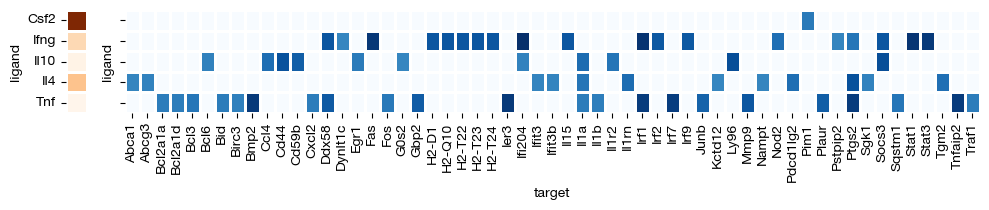

In [32]:
fig = expm.plot_rna_nichenet_ligands(
    key_nichenet = 'nichenet',
    figsize = (10, 2.2),
    width_ratios = [0.2, 8]
)

In [34]:
expm.save(save_samples = False)

[i] main dataset write to expression/subsets/mono-neutro.h5mu
